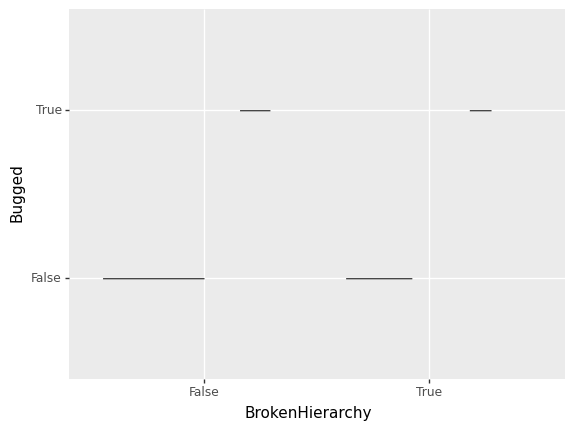

<ggplot: (-9223372036545774890)>


In [32]:
import os
from pathlib import Path
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_violin
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from config import Config
from paper.utils import EstimatorSelectionHelper
from projects import ProjectName

project = ProjectName.Camel
dataset_dir = Config.get_work_dir_path(os.path.join("paper", "datasets", project.github()))
Path(dataset_dir).mkdir(parents=True, exist_ok=True)
training_path = os.path.join(dataset_dir, "training.csv")
testing_path = os.path.join(dataset_dir, "testing.csv")

training_df = pd.read_csv(training_path)
testing_df = pd.read_csv(testing_path)

training_df = training_df.dropna()

p = (ggplot(data=training_df, mapping=aes(x='BrokenHierarchy', y='Bugged'))
    + geom_violin())
print(p)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.1s finished


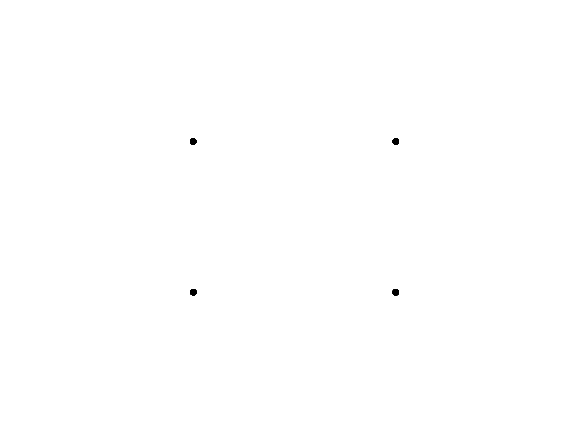

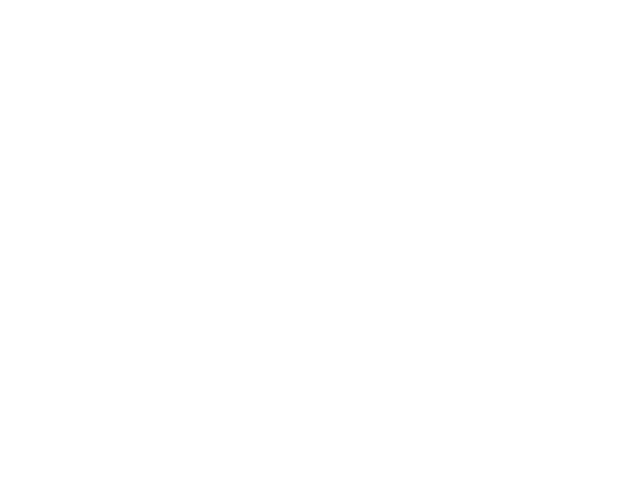

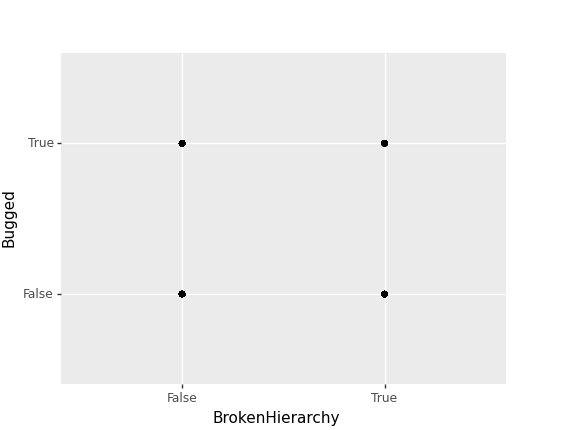

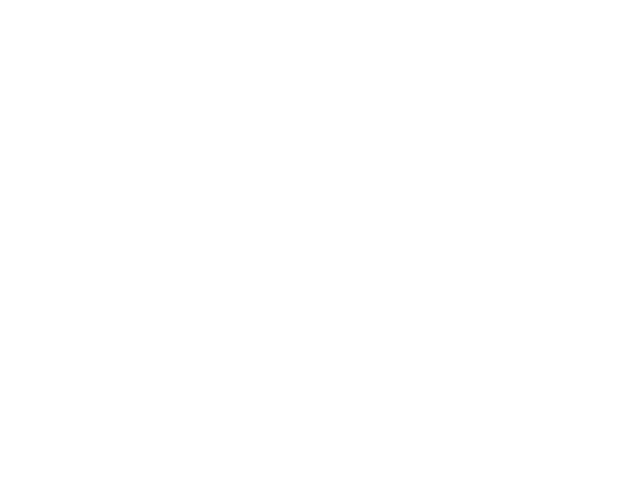

TypeError: <lambda>() missing 1 required positional argument: 'score'

KeyboardInterrupt: 

In [28]:
import os
from pathlib import Path
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from config import Config
from paper.utils import EstimatorSelectionHelper
from projects import ProjectName

project = ProjectName.Camel
dataset_dir = Config.get_work_dir_path(os.path.join("paper", "datasets", project.github()))
Path(dataset_dir).mkdir(parents=True, exist_ok=True)
training_path = os.path.join(dataset_dir, "training.csv")

training_df = pd.read_csv(training_path).dropna().astype(int)

y = training_df.pop('Bugged').values
X = training_df.values

models = {'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis()}
params = {'LinearDiscriminantAnalysis': {'solver': ['svd', 'lsqr']}}
helper = EstimatorSelectionHelper(models, params)
helper.fit(X, y, scoring='f1')
helper.score_summary()